In [4]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random

In [5]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [6]:
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

wvfrm = 


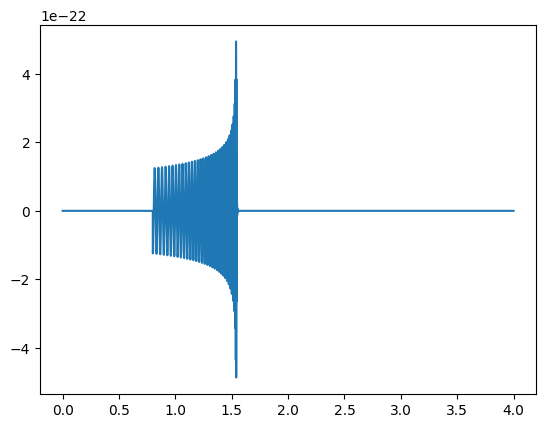

In [7]:
hp, hc = get_td_waveform(
    approximant="IMRPhenomT",
    mass1=15,
    mass2=20,
    delta_t=delta_t,
    f_lower=30,
)
hp.resize(16384)

wvfrm = hp / 800
wvfrm.start_time = 0

excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
x = random.choice([value for value in range(3, 21) if value not in excluded_values])
wvfrm.roll(len(wvfrm) // 5)
wvfrm.cyclic_time_shift(wvfrm.start_time)
print("wvfrm = ")

plt.plot(wvfrm.sample_times, wvfrm)

In [8]:
print(max(wvfrm))

    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
print("Max occurs at time:", max_time)

4.93895954093384e-22
Max occurs at time: 1.5380859375


In [9]:
# genereating noise
noise = noise_from_psd(tsamples, delta_t, psd, seed=9)

# adding noise to waveform
noise._epoch = wvfrm._epoch
signal = wvfrm + noise

# SNR calculation
snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time_peak = snr.sample_times[peak]
snr_peak = abs(snrp)

print(peak)

0


[29.30213516 29.00297692 28.12767284 ... 26.73847021 28.06813605
 28.96245462]


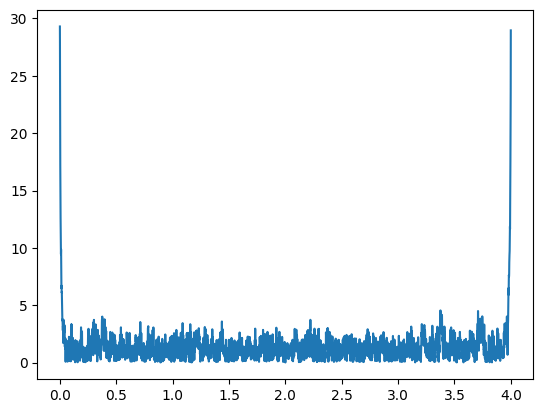

In [10]:
print(abs(snr))
plt.plot(snr.sample_times, abs(snr))

SNR =  29.302135160020153


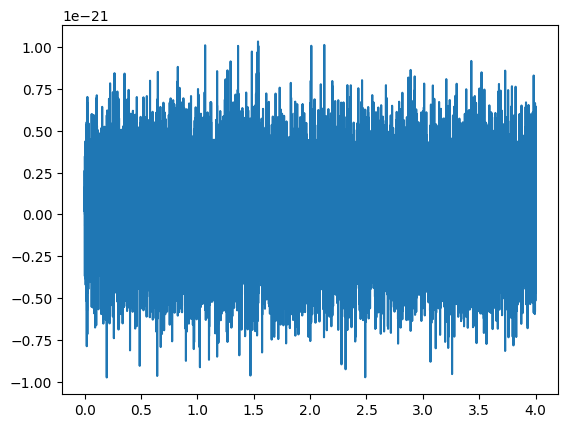

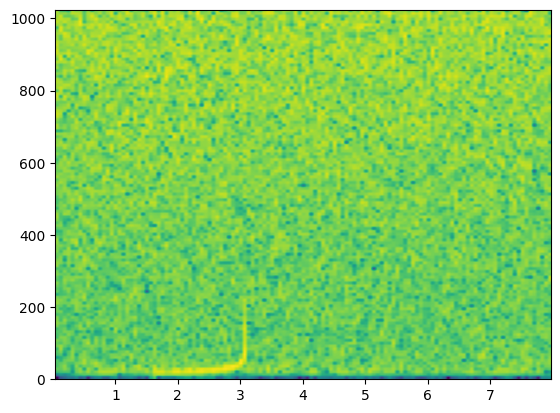

In [11]:
print("SNR = ", snr_peak)

# plt.axis("off")  # Turn off the axis labels
plt.plot(
    signal.sample_times,
    signal,
)
plt.show()

plt.specgram(signal, Fs=2048)
# plt.axis("off")  # Turn off the axis labels
plt.show()